Your government has lost track of a high profile foreign spy, and they have requested your help to track him down. As part of his attempts to evade capture, he has employed a simple strategy. Each day the spy moves from the country that he is currently in to a neighboring country. The spy cannot skip over a country (for example, he cannot go from Chile to Ecuador in one day). The movement probabilities are equally distributed amongst the neighboring countries. For example, if the spy is currently in Ecuador, there is a 50% chance he will move to Colombia and a 50% chance he will move to Peru. The spy was last seen in Chile and will only move about countries that are in South America. He has been moving about the countries for several weeks.

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# limit pandas display precision for better readability
pd.set_option("precision", 2)

plt.style.use("fivethirtyeight")

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_South_American_countries_by_area'
countries = pd.read_html(url,match = "Country")

In [3]:
countries = ['Chile','Argentina','Bolivia','Uruguay','Brazil','Paraguay','Peru','Columbia','Venezuela','Guyana','Suriname','French Guiana','Ecuador']
countries.sort()
countries

['Argentina',
 'Bolivia',
 'Brazil',
 'Chile',
 'Columbia',
 'Ecuador',
 'French Guiana',
 'Guyana',
 'Paraguay',
 'Peru',
 'Suriname',
 'Uruguay',
 'Venezuela']

In [4]:
adjacency_matrix = np.array([[0,1,1,1,0,0,0,0,1,0,0,1,0],
                     [1,0,1,1,0,0,0,0,1,1,0,0,0],
                     [1,1,0,0,1,0,1,1,1,1,1,1,1],
                     [1,1,0,0,0,0,0,0,0,1,0,0,0],
                     [0,0,1,0,0,1,0,0,0,0,0,0,1],
                     [0,0,0,0,1,0,0,0,0,1,0,0,0],
                     [0,0,1,0,0,0,0,0,0,0,1,0,0],
                     [0,0,1,0,0,0,0,0,0,0,1,0,1],
                     [1,1,1,0,0,0,0,0,0,0,0,0,0],
                     [0,1,1,1,1,1,0,0,0,0,0,0,0],
                     [0,0,1,0,0,0,1,1,0,0,0,0,0],
                     [1,0,1,0,0,0,0,0,0,0,0,0,0],
                     [0,0,1,0,1,0,0,1,0,0,0,0,0]])



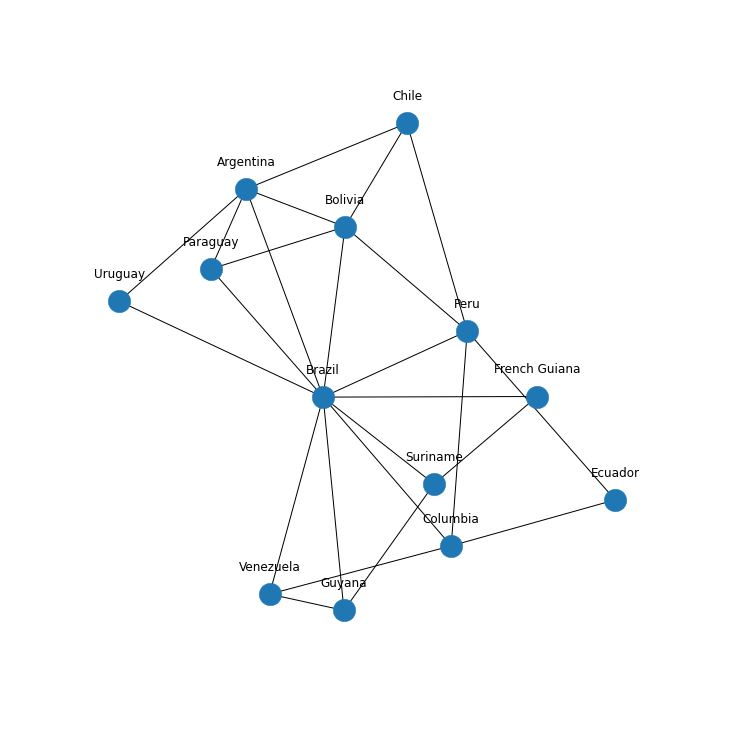

In [7]:
np.random.seed(0)
graph = plt.figure(figsize=(10, 10))


def make_label_dict(labels):
    l = {}
    for i, label in enumerate(labels):
        l[i] = label
    return l


G = nx.Graph(adjacency_matrix)

labels = make_label_dict(countries)

# layout the graph
pos = nx.spring_layout(G)

# draw graph
ax = nx.draw(G, pos, node_size=500, with_labels=False)

# draw node labels
for p in pos:  # raise text positions
    pos[p][1] += 0.10
nx.draw_networkx_labels(G, pos, labels=labels)
f = 0.1
x = plt.xlim()[1] - plt.xlim()[0]
y = plt.ylim()[1] - plt.ylim()[0]
plt.xlim(plt.xlim()[0] - f * x, plt.xlim()[1] + f * x)
plt.ylim(plt.ylim()[0] - f * x, plt.ylim()[1] + f * x)
plt.show()

In [8]:
prob_matrix = np.zeros((13,13))



In [9]:
prob_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
value = adjacency_matrix.astype(float)

# normalize by row
for i in range(len(adjacency_matrix)):
    value[i, :] /= value[i, :].sum()

#value

In [11]:
np.set_printoptions(precision=2)
pd.DataFrame(value).style.background_gradient(cmap="Spectral",axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00,0.20,0.20,0.20,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.20,0.00
1,0.20,0.00,0.20,0.20,0.00,0.00,0.00,0.00,0.20,0.20,0.00,0.00,0.00
2,0.10,0.10,0.00,0.00,0.10,0.00,0.10,0.10,0.10,0.10,0.10,0.10,0.10
3,0.33,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00
4,0.00,0.00,0.33,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.33
5,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00
6,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00
7,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.33
8,0.33,0.33,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.20,0.20,0.20,0.20,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00


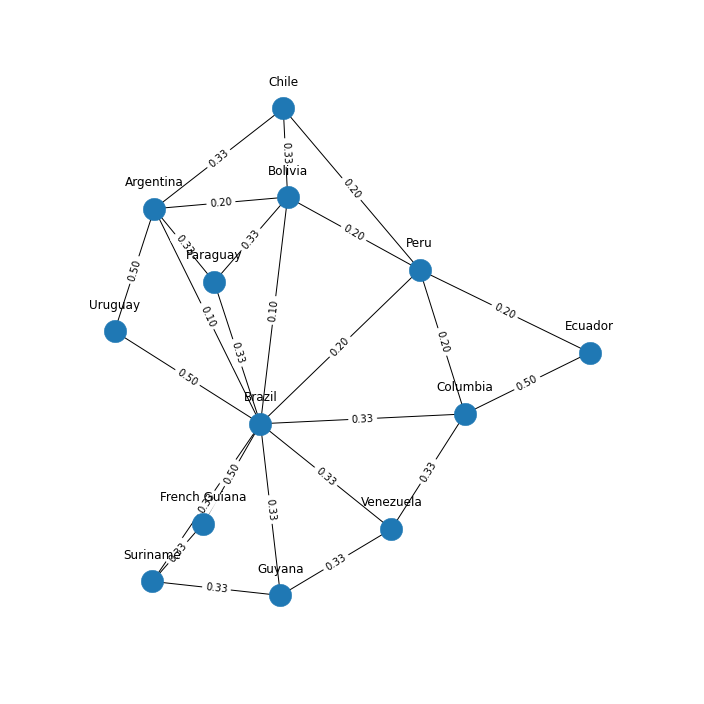

In [13]:
np.random.seed(0)
graph = plt.figure(figsize=(10, 10))

G = nx.Graph(value)

edge_labels = dict(((u, v), f'{d["weight"]:.2f}') for u, v, d in G.edges(data=True))

# layout the graph
# TODO: use capital coordinates to layout the graph
pos = nx.spring_layout(G)

# add edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# draw graph
ax = nx.draw(G, pos, node_size=500, with_labels=False)

# draw node labels
for p in pos:  # raise text positions
    pos[p][1] += 0.10
nx.draw_networkx_labels(G, pos, labels=labels)
plt.tight_layout()
f = 0.1
x = plt.xlim()[1] - plt.xlim()[0]
y = plt.ylim()[1] - plt.ylim()[0]
plt.xlim(plt.xlim()[0] - f * x, plt.xlim()[1] + f * x)
plt.ylim(plt.ylim()[0] - f * x, plt.ylim()[1] + f * x)
plt.show()

In [14]:
value[0, :].astype(float)/value[0, :].sum()


array([0. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.2, 0. ])

In [15]:
for i in range(len(value)):
    value[i,:] /= value[i,:].sum()
np.set_printoptions(precision=2)
pd.DataFrame().style.background_gradient(cmap="Spectral",axis=1)

In [17]:
chile_idx = 3
pd.Series(value[chile_idx], index=countries)
x = np.zeros((len(countries), 1), dtype=float)
x[chile_idx] = 1
x

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [18]:
probs = np.dot(x.T, value)
pd.Series(probs.ravel(), index=countries)

Argentina        0.33
Bolivia          0.33
Brazil           0.00
Chile            0.00
Columbia         0.00
Ecuador          0.00
French Guiana    0.00
Guyana           0.00
Paraguay         0.00
Peru             0.33
Suriname         0.00
Uruguay          0.00
Venezuela        0.00
dtype: float64

In [19]:
probs = np.dot(x.T, np.dot(value, value))
pd.Series(probs.ravel(), index=countries)

Argentina        0.07
Bolivia          0.13
Brazil           0.20
Chile            0.20
Columbia         0.07
Ecuador          0.07
French Guiana    0.00
Guyana           0.00
Paraguay         0.13
Peru             0.07
Suriname         0.00
Uruguay          0.07
Venezuela        0.00
dtype: float64

In [20]:
def probability_vector(t):
    probs = np.dot(x.T, np.linalg.matrix_power(value, t))
    return pd.Series(probs.ravel(), index=countries)

In [21]:
initial_state = {0: probability_vector(0)}
comparison = pd.DataFrame(initial_state)

days = [1, 2, 3, 5, 10, 100, 1000]
for t in days:
    comparison[t] = probability_vector(t)
    
comparison

,0,1,2,3,5,10,100,1000
Argentina,0.0,0.33,0.07,0.19,0.13,0.10,0.10,0.10
Bolivia,0.0,0.33,0.13,0.16,0.12,0.10,0.09,0.09
Brazil,0.0,0.00,0.20,0.15,0.19,0.21,0.21,0.21
Chile,1.0,0.00,0.20,0.05,0.06,0.06,0.05,0.05
Columbia,0.0,0.00,0.07,0.07,0.08,0.08,0.08,0.08
Ecuador,0.0,0.00,0.07,0.04,0.04,0.04,0.04,0.04
French Guiana,0.0,0.00,0.00,0.02,0.03,0.04,0.04,0.04
Guyana,0.0,0.00,0.00,0.02,0.04,0.06,0.07,0.07
Paraguay,0.0,0.00,0.13,0.06,0.06,0.06,0.06,0.06
Peru,0.0,0.33,0.07,0.15,0.10,0.08,0.08,0.08
